<a href="https://colab.research.google.com/github/Srijavali/Ai-ml-projects-labs-submission/blob/main/Implementing_KNN_from_scratch_and_visualize_Algorithm_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from collections import Counter

In [2]:
def predict(X_train, y_train, X_test, k):
    distances = []
    targets = []

    for i in range(len(X_train)):
        # compute and store L2 distance
        distances.append([np.sqrt(np.sum(np.square(X_test - X_train[i, :]))), i])

    distances = sorted(distances)

    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    # return most common target
    return Counter(targets).most_common(1)[0][0]

In [3]:
def k_nearest_neighbor(X_train, y_train, X_test, k):

    assert k <= len(X_train), "[!] K cannot be larger than number of samples."

    # loop over all observations
    predictions = []
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

    return np.asarray(predictions)

In [4]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

In [5]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

In [6]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df["target"] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
X = np.array(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y = np.array(df['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

In [8]:
# Making our predictions
predictions = k_nearest_neighbor(X_train, y_train, X_test,11)

# evaluating accuracy
accuracy = Accuracy(y_test, predictions)
print("The accuracy of our classifier is {} %".format(100*accuracy))

The accuracy of our classifier is 98.0 %


In [9]:
from sklearn.neighbors import KNeighborsClassifier
sklearn_knn = KNeighborsClassifier(n_neighbors=11)
sklearn_knn.fit(X_train,y_train)
sklearn_predictions = sklearn_knn.predict(X_test)
accuracy = accuracy_score(y_test, sklearn_predictions)
print("The accuracy of Sklearn classifier is {} %".format(100*accuracy))

The accuracy of Sklearn classifier is 96.0 %


In [10]:
def predict(X_train, y_train, X_test, k):
    distances = []
    targets = []

    for i in range(len(X_train)):
        # compute and store L2 distance
        distances.append([np.sqrt(np.sum(np.square(X_test - X_train[i, :]))), i])

    # Sort distances and get indices of k-nearest neighbors
    distances = sorted(distances)[:k]

    # Get labels and distances of k-nearest neighbors
    neighbors_labels = [y_train[dist[1]] for dist in distances]
    neighbors_distances = [dist[0] for dist in distances]

    # Return labels and distances
    return neighbors_labels, neighbors_distances

def k_nearest_neighbor(X_train, y_train, X_test, k):

    assert k <= len(X_train), "[!] K cannot be larger than number of samples."

    # loop over all observations
    predictions = []
    for i in range(len(X_test)):
        # Get neighbors' labels and distances for each test point
        neighbors_labels, neighbors_distances = predict(X_train, y_train, X_test[i, :], k)
        predictions.append([neighbors_labels, neighbors_distances])  # Store both

    return predictions  # Return a list of [labels, distances] for each test point

In [11]:
k = 7
o = k_nearest_neighbor(X_train, y_train, X_test, k)
for i, (labels, dist) in enumerate(o):  # Now 'labels' and 'dist' will be correctly unpacked
    print(f"Test Point {i + 1}: Neighbors' Labels = {labels}, Distances = {dist}")  # Print the results

Test Point 1: Neighbors' Labels = [0, 0, 0, 0, 0, 0, 0], Distances = [0.3464101615137753, 0.3872983346207418, 0.41231056256176646, 0.4582575694955838, 0.45825756949558394, 0.46904157598234253, 0.47958315233127247]
Test Point 2: Neighbors' Labels = [1, 1, 1, 2, 1, 1, 1], Distances = [0.19999999999999973, 0.24494897427831785, 0.33166247903553975, 0.4358898943540673, 0.48989794855663593, 0.5000000000000004, 0.5196152422706631]
Test Point 3: Neighbors' Labels = [2, 2, 2, 2, 2, 2, 2], Distances = [0.24494897427831822, 0.3605551275463989, 0.360555127546399, 0.374165738677394, 0.42426406871192807, 0.5744562646538024, 0.574456264653803]
Test Point 4: Neighbors' Labels = [1, 1, 1, 1, 1, 1, 1], Distances = [0.17320508075688815, 0.22360679774997935, 0.26457513110645864, 0.36055512754639923, 0.42426406871192895, 0.5196152422706629, 0.556776436283002]
Test Point 5: Neighbors' Labels = [2, 2, 2, 1, 1, 1, 1], Distances = [0.17320508075688762, 0.2828427124746193, 0.38729833462074154, 0.424264068711928

In [12]:
def k_nearest_neighbor(X_train, y_train, X_test, k):
    assert k <= len(X_train), "[!] K cannot be larger than number of samples."
    predictions = []
    for i in range(len(X_test)):
        # Get neighbors' labels and distances for each test point
        neighbors_labels, neighbors_distances = predict(X_train, y_train, X_test[i, :], k)
        # Only store the most common label (prediction)
        predictions.append(Counter(neighbors_labels).most_common(1)[0][0])
    return np.asarray(predictions) # Convert to numpy array for consistency

# Make prediction
predictions = k_nearest_neighbor(X_train, y_train, X_test, 11)

# Call accuracy with y_test (ground truth) and predictions
accuracy = Accuracy(y_test, predictions)
print("The accuracy of our classifier is {} %".format(100*accuracy))

The accuracy of our classifier is 98.0 %


In [ ]:
# title Plotting Voronoi regions
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

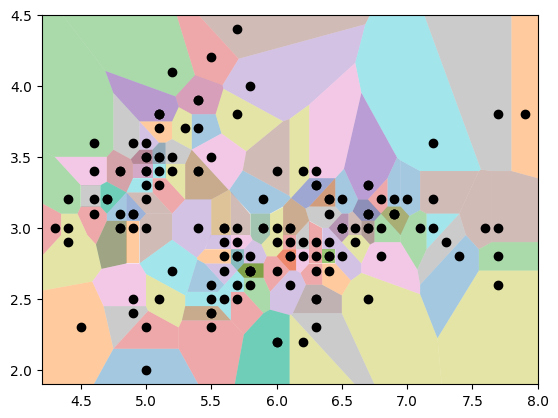

In [ ]:
## Plotting Voronoi regions for the Iris dataset

points = []
xpts = np.array(df['sepal length (cm)'])
ypts = np.array(df['sepal width (cm)'])
for i in range(len(xpts)):
  points.append([xpts[i],ypts[i]])
# print(points)
points = np.array(points)
# compute Voronoi tesselation
vor = Voronoi(points)

regions, vertices = voronoi_finite_polygons_2d(vor)

for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.plot(points[:,0], points[:,1], 'ko')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

plt.show()

In [ ]:
from matplotlib.colors import ListedColormap
import seaborn as sns


def decision_boundary_plot(x_dec,y_dec,k):
  h = .02  # step size in the mesh

  # Create color maps
  n = len(set(y_dec))
  cmap_light = ListedColormap(['pink', 'green', 'cyan','yellow'][:n])
  cmap_bold = ['pink', 'darkgreen', 'blue','yellow'][:n]

  for weights in ['uniform', 'distance']:
      # we create an instance of Neighbours Classifier and fit the data.
      clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
      clf.fit(x_dec, y_dec)

      # Plot the decision boundary. For that, we will assign a color to each
      # point in the mesh [x_min, x_max]x[y_min, y_max].
      x_min, x_max = x_dec[:, 0].min() - 1, x_dec[:, 0].max() + 1
      y_min, y_max = x_dec[:, 1].min() - 1, x_dec[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))
      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

      # Put the result into a color plot
      Z = Z.reshape(xx.shape)
      plt.figure(figsize=(8, 6))
      plt.contourf(xx, yy, Z, cmap=cmap_light)

      # Plot also the training points
      sns.scatterplot(x=x_dec[:, 0], y=x_dec[:, 1], hue=y_dec,
                      palette=cmap_bold, alpha=1.0, edgecolor="black")
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      plt.title("Multi-Classification (k = %i, weights = '%s')"% (k, weights))

  plt.show()


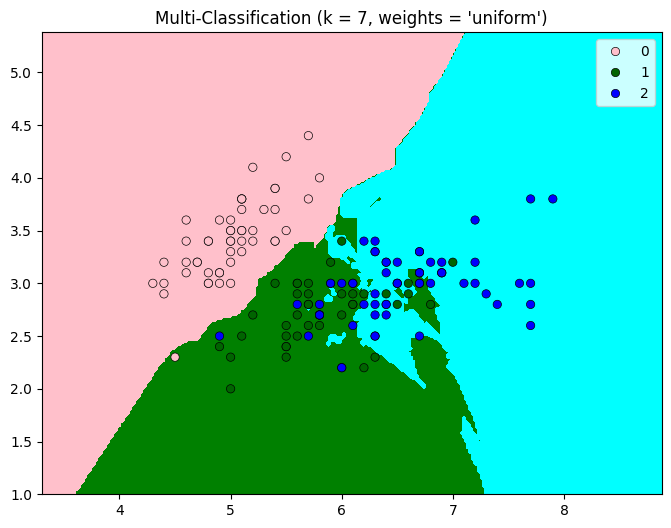

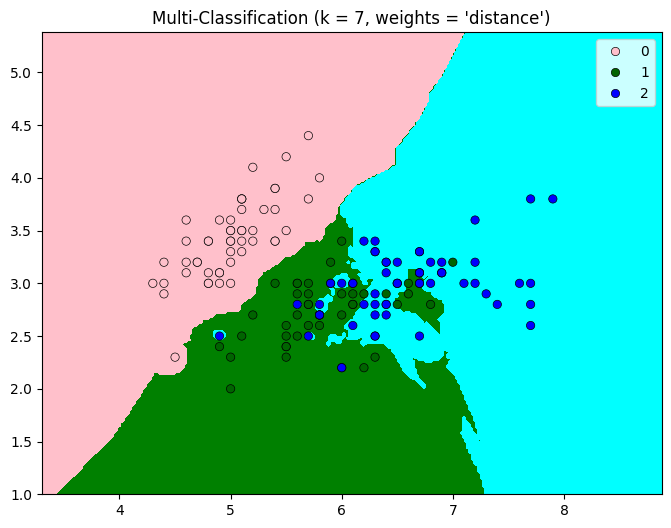

In [ ]:
x_pts = X[:,:2]
y_pts = y
decision_boundary_plot(x_pts,y_pts,7)

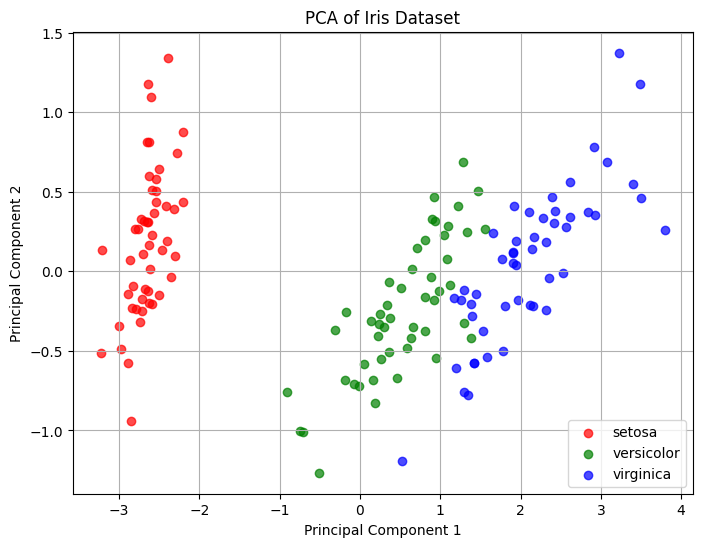

In [ ]:
## TASK-2
## In the above cells, we saw the Voronoi diagram of the data and plotted the KNN decision boundaries
## by only considering two attributes of the dataset. You must be already familiar with PCA.
## Apply PCA on the dataset above to reduce it to two dimensions.
## Plot the Voronoi diagram and Decision boundaries after that.
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Feature matrix
y = iris.target  # Target vector

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(
    data=X_pca, columns=['Principal Component 1', 'Principal Component 2']
)
pca_df['Target'] = y

# Plot the results
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
targets = iris.target_names

for target, color in zip([0, 1, 2], colors):
    plt.scatter(
        pca_df.loc[pca_df['Target'] == target, 'Principal Component 1'],
        pca_df.loc[pca_df['Target'] == target, 'Principal Component 2'],
        c=color, label=targets[target], alpha=0.7
    )

plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

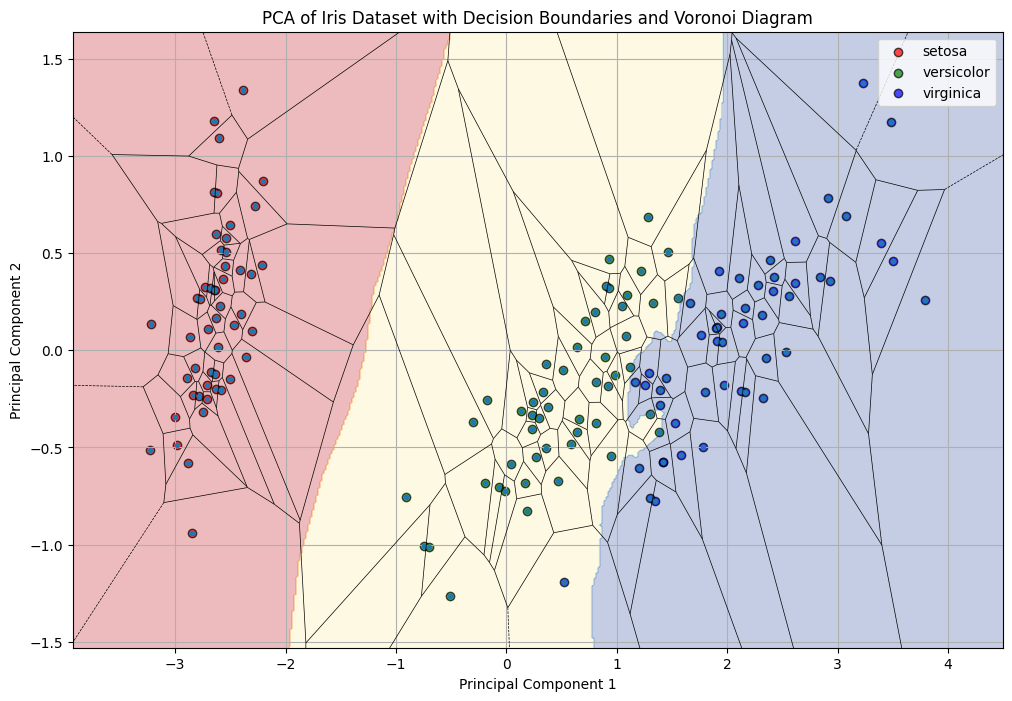

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Feature matrix
y = iris.target  # Target vector

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(
    data=X_pca, columns=['Principal Component 1', 'Principal Component 2']
)
pca_df['Target'] = y

# Fit a KNN classifier to create decision boundaries
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_pca, y)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Predict on the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)

# Plot Voronoi diagram
vor = Voronoi(X_pca)
voronoi_plot_2d(vor, ax=plt.gca(), show_vertices=False, line_colors='k', line_width=0.5)

# Plot the PCA-transformed data
colors = ['r', 'g', 'b']
targets = iris.target_names
for target, color in zip([0, 1, 2], colors):
    plt.scatter(
        pca_df.loc[pca_df['Target'] == target, 'Principal Component 1'],
        pca_df.loc[pca_df['Target'] == target, 'Principal Component 2'],
        c=color, label=targets[target], edgecolor='k', alpha=0.7
    )

plt.title('PCA of Iris Dataset with Decision Boundaries and Voronoi Diagram')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# print(confusion_matrix(y_test,predictions))
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,13,0,0,13
1,0,22,0,22
2,0,1,14,15
All,13,23,14,50


Text(0.5, 23.52222222222222, 'Predicted label')

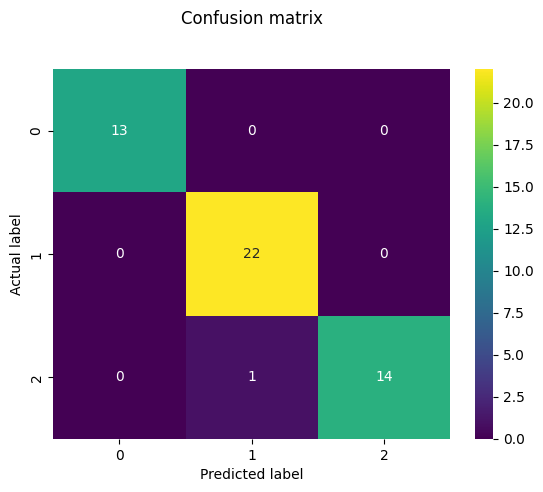

In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.96      1.00      0.98        22
           2       1.00      0.93      0.97        15

    accuracy                           0.98        50
   macro avg       0.99      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [ ]:
# Upload the Car evaluation data CSV file that has been shared with you.
# Run this cell, click on the 'Choose files' button and upload the file.
from google.colab import files
uploaded = files.upload()

Saving car_evaluation.csv to car_evaluation.csv


In [ ]:
car_df = pd.read_csv('car_evaluation.csv')
car_df

,buying price,maintenance cost,num_doors,num_persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [ ]:
for x in car_df.columns:
  # print(x)
  le = preprocessing.LabelEncoder()
  le.fit(car_df[x])
  car_df[x]=le.transform(car_df[x])

car_df

,buying price,maintenance cost,num_doors,num_persons,lug_boot,safety,decision
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [ ]:
dataset = car_df.values
X = dataset[:,0:6]
y = np.array(dataset[:,6])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
score = accuracy_score(y_test, predictions)
print("The accuracy of the classifier on Car evaluation dataset is {:.2f} %".format(100*score))

The accuracy of the classifier on Car evaluation dataset is 89.88 %


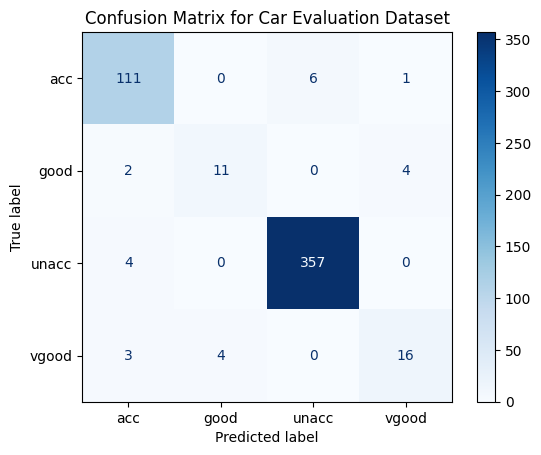

In [ ]:
## TASK-3
## Plot a Confusion Matrix for the results of the Car evaluation dataset
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# TASK-3: Load Car Evaluation Dataset
car_data = pd.read_csv("/content/car_evaluation.csv")

# Preprocess the data
car_data.columns = ['Buying', 'Maint', 'Doors', 'Persons', 'Lug_Boot', 'Safety', 'Class']
car_data = pd.get_dummies(car_data, columns=['Buying', 'Maint', 'Doors', 'Persons', 'Lug_Boot', 'Safety'])
X_car = car_data.drop('Class', axis=1)
y_car = car_data['Class']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_car, y_car, test_size=0.3, random_state=42)

# Train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=dt_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Car Evaluation Dataset')
plt.show()


In [ ]:
## TASK-4
## Print a Classification Report for the results of the Car evaluation dataset
# Print the classification report
report = classification_report(y_test, y_pred, target_names=dt_classifier.classes_)
print("Classification Report for Car Evaluation Dataset:\n")
print(report)


Classification Report for Car Evaluation Dataset:

              precision    recall  f1-score   support

         acc       0.93      0.94      0.93       118
        good       0.73      0.65      0.69        17
       unacc       0.98      0.99      0.99       361
       vgood       0.76      0.70      0.73        23

    accuracy                           0.95       519
   macro avg       0.85      0.82      0.83       519
weighted avg       0.95      0.95      0.95       519



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


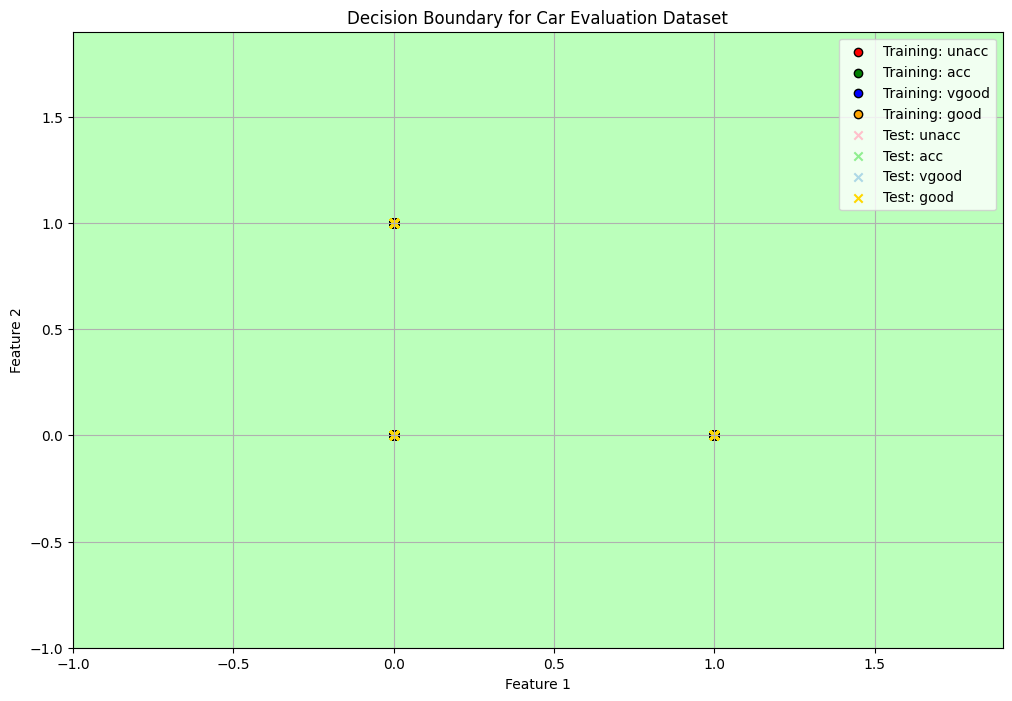

In [ ]:
## TASK-5
## Plot the Decision boundary diagram for the classifier of the Car evaluation dataset
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# TASK-5: Load Car Evaluation Dataset
car_data = pd.read_csv("/content/car_evaluation.csv")

# Preprocess the data
car_data.columns = ['Buying', 'Maint', 'Doors', 'Persons', 'Lug_Boot', 'Safety', 'Class']
car_data = pd.get_dummies(car_data, columns=['Buying', 'Maint', 'Doors', 'Persons', 'Lug_Boot', 'Safety'])
X_car = car_data.drop('Class', axis=1)
y_car = car_data['Class']

# Reduce to 2 features for visualization purposes (example only, not ideal for accuracy)
X_car = X_car.iloc[:, :2]  # Taking only the first two features for visualization

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_car, y_car, test_size=0.3, random_state=42)

# Train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Plot the decision boundary
x_min, x_max = X_car.iloc[:, 0].min() - 1, X_car.iloc[:, 0].max() + 1
y_min, y_max = X_car.iloc[:, 1].min() - 1, X_car.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict on grid, then convert to numeric using LabelEncoder
Z = dt_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
le = preprocessing.LabelEncoder() # Create a LabelEncoder object
le.fit(y_car)  # Fit it with the original target values
Z_numeric = le.transform(Z)  # Transform the predictions into numeric form
Z_numeric = Z_numeric.reshape(xx.shape)  # Reshape back to the grid shape

# Plotting the results
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z_numeric, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFCCAA', '#AACCFF'])) # Use Z_numeric for contourf

# Scatter plot of training data
for class_value, color in zip(y_car.unique(), ['red', 'green', 'blue', 'orange', 'purple']):
    idx = y_train == class_value
    plt.scatter(
        X_train.loc[idx.index, X_train.columns[0]], X_train.loc[idx.index, X_train.columns[1]], #Change to .loc and access columns using their names or indices
        c=color, label=f'Training: {class_value}', edgecolor='k'
    )

# Scatter plot of testing data
for class_value, color in zip(y_car.unique(), ['pink', 'lightgreen', 'lightblue', 'gold', 'violet']):
    idx = y_test == class_value
    plt.scatter(
        X_test.loc[idx.index, X_test.columns[0]], X_test.loc[idx.index, X_test.columns[1]], #Change to .loc and access columns using their names or indices
        c=color, label=f'Test: {class_value}', marker='x'
    )

plt.title('Decision Boundary for Car Evaluation Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

<Figure size 1200x800 with 0 Axes>

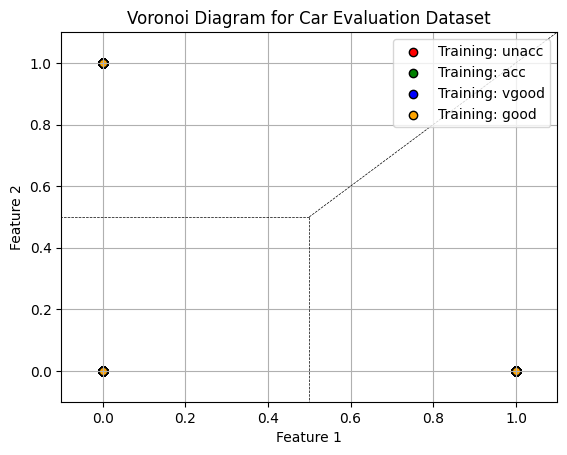

In [ ]:
## TASK-6
## Plot the Voronoi diagram for the classifier of the Car evaluation dataset
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.spatial import Voronoi, voronoi_plot_2d

# TASK-6: Load Car Evaluation Dataset
car_data = pd.read_csv("/content/car_evaluation.csv")

# Preprocess the data
car_data.columns = ['Buying', 'Maint', 'Doors', 'Persons', 'Lug_Boot', 'Safety', 'Class']
car_data = pd.get_dummies(car_data, columns=['Buying', 'Maint', 'Doors', 'Persons', 'Lug_Boot', 'Safety'])
X_car = car_data.drop('Class', axis=1)
y_car = car_data['Class']

# Reduce to 2 features for visualization purposes (example only, not ideal for accuracy)
X_car = X_car.iloc[:, :2]  # Taking only the first two features for visualization

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_car, y_car, test_size=0.3, random_state=42)

# Train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Create Voronoi diagram
vor = Voronoi(X_train)

# Plotting the results
plt.figure(figsize=(12, 8))

# Plot Voronoi regions
voronoi_plot_2d(vor, show_vertices=False, line_colors='k', line_width=0.5, point_size=0)  # Customize as needed

# Scatter plot of training data
for class_value, color in zip(y_car.unique(), ['red', 'green', 'blue', 'orange', 'purple']):
    idx = y_train == class_value
    plt.scatter(
        X_train.loc[idx.index, X_train.columns[0]], X_train.loc[idx.index, X_train.columns[1]],
        c=color, label=f'Training: {class_value}', edgecolor='k'
    )

plt.title('Voronoi Diagram for Car Evaluation Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

In the section on Decision boundaries, you must have seen that we ran the KNN algorithm twice: first with the weights set to 'uniform' and then set to 'distance'. Find out the difference between these two.

```
Answer
```
weights='uniform'


*   All neighbors have equal weight in the prediction. Each neighbor's vote contributes equally to the final classification, regardless of their distance from the query point. This is the default setting in most KNN implementations.
*    Closer and farther neighbors have the same influence on the outcome. It can lead to ties if multiple classes have an equal number of neighbors within the k-nearest neighbors.

weights='distance'


*    Closer neighbors have greater weight in the prediction. The influence of each neighbor is inversely proportional to its distance from the query point. The closer a neighbor is, the more it affects the classification.
*  Closer neighbors have a stronger influence, resulting in less likelihood of ties. It can potentially lead to overfitting, as the model might become overly sensitive to the nearest neighbor.

Generally, Distance can improve more accuracy when comapared to the uniform.




What do you think could be the drawbacks of using KNN ?

```
# Answer
```
1. **Computationally Expensive:**


*  Reasoning: KNN needs to calculate the distance between the query point and all data points in the training set. This can be very time-consuming, especially with large datasets.
*  Consequence: Prediction time can be slow, making it less suitable for real-time applications.



2. **Memory Intensive:**



*   Reasoning: KNN stores the entire training dataset in memory.
*   Consequence: This can be a problem when dealing with very large datasets as it might exceed available memory.




3. **Sensitive to Irrelevant Features:**


*  Reasoning: KNN treats all features equally when calculating distances. If your dataset contains irrelevant or redundant features, they can negatively impact the accuracy of the model.
* Consequence: It's important to carefully select and preprocess your features before applying KNN. Feature scaling is often necessary to ensure that all features contribute equally to the distance calculation.  



4. **Curse of Dimensionality:**


*   Reasoning: As the number of features increases, the distance between data points becomes less meaningful. This is known as the "curse of dimensionality."
*   Consequence: KNN's performance can degrade in high-dimensional spaces. Dimensionality reduction techniques, such as PCA, can be used to mitigate this issue.




5. **Choosing the Right Value of K**:


*   Reasoning: The performance of KNN is highly dependent on the value of K (the number of neighbors). If K is too small, the model can be sensitive to noise and outliers. If K is too large, it can oversimplify the decision boundaries.
* Consequence: Finding the optimal value of K requires experimentation and careful evaluation. Techniques like cross-validation can help in selecting the best K value.  

6. **Sensitive to Imbalanced Datasets:**

*   Reasoning: If your dataset has a significant class imbalance (one class has many more samples than others), KNN may be biased towards the majority class.
*  Consequence: Strategies like oversampling or undersampling might be needed to address this issue.